## e-statを使ってVARLiNGAM

In [38]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR
import seaborn as sns
import matplotlib.pyplot as plt

result_dir_path = Path('result')
if not result_dir_path.exists():
    result_dir_path.mkdir(parents=True)

Pythonを使った固定効果モデルでの推定
https://www.dskomei.com/entry/2020/09/13/173600
プーリング・データとパネル・データ
https://py4etrics.github.io/15_Pooling.html#id6

In [367]:
df = pd.read_csv("/Users/ShuntaroMiwa/00 python/simizu/python用3.csv")
df.dtypes

year                       int64
region_c                   int64
region                    object
men15-19                   int64
men20-24                   int64
men25-29                   int64
men30-34                   int64
women15-19                 int64
women20-24                 int64
women25-29                 int64
women30-34                 int64
wage_men                 float64
wage_women               float64
wage _highsc_men         float64
wage _highsc_women       float64
num_univ per1000Cap      float64
num_vocsch per1000Cap    float64
all_highsc_getjob          int64
all_highsc_higher          int64
men_highsc_getjob          int64
men_highsc_higher          int64
women_highsc_higher        int64
women_highsc_getjob        int64
income perCap            float64
productivity             float64
GDP perCap               float64
worker%                  float64
TFP                      float64
GDPperCap                float64
dtype: object

In [290]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [368]:
df["region"].unique()

array(['北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県',
       '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県',
       '山梨県', '長野県', '岐阜県', '静岡県', '愛知県', '三重県', '滋賀県', '京都府', '大阪府',
       '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県',
       '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県',
       '鹿児島県', '沖縄県'], dtype=object)

In [369]:
df['year'] = df['year'].astype(int)
df.index = df['year']

In [296]:
import statsmodels.api as sm
from statsmodels.tsa import stattools
from statsmodels.tsa.api import VAR
import seaborn as sns

In [371]:

# df.year = pd.date_range(
#     str(df['year'].min()), 
#     periods=len(df), 
#     freq='Y'
#)
target_data = df[['women25-29', 'women_highsc_higher','num_univ per1000Cap','worker%','wage_women','GDP perCap','women_highsc_getjob','num_vocsch per1000Cap']]

In [372]:
df.head

<bound method NDFrame.head of       year  region_c region  men15-19  men20-24  men25-29  men30-34  \
year                                                                  
1981  1981      1000    北海道    202000    184000    211000    266000   
1981  1981      2000    青森県     58000     47000     56000     69000   
1981  1981      3000    岩手県     51000     39000     51000     61000   
1981  1981      4000    宮城県     77000     80000     83000    100000   
1981  1981      5000    秋田県     42000     33000     45000     56000   
...    ...       ...    ...       ...       ...       ...       ...   
2012  2012     43000    熊本県     46000     40000     45000     50000   
2012  2012     44000    大分県     29000     25000     29000     33000   
2012  2012     45000    宮崎県     29000     21000     26000     30000   
2012  2012     46000   鹿児島県     42000     32000     39000     45000   
2012  2012     47000    沖縄県     43000     37000     42000     45000   

      women15-19  women20-24  women25-29  ... 

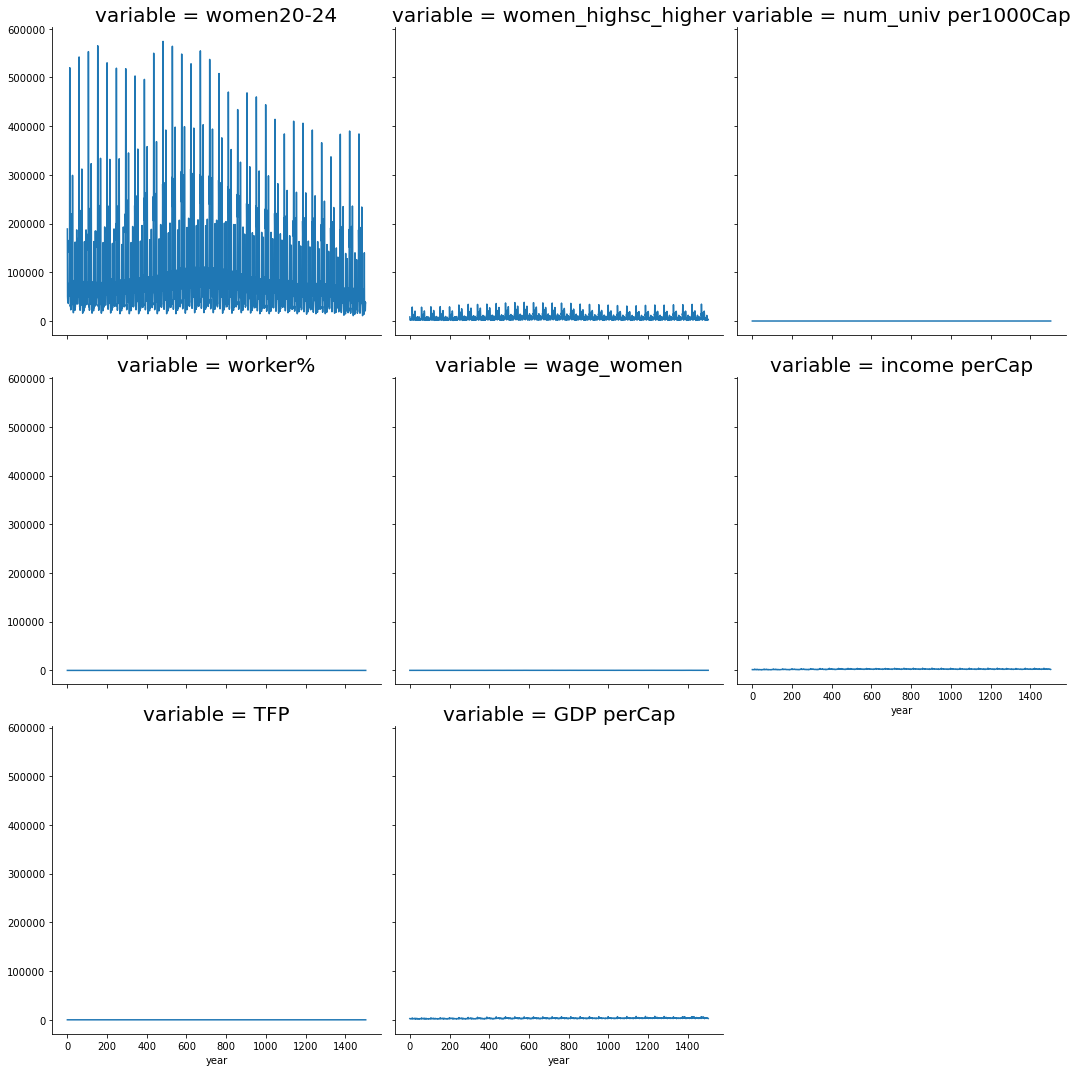

In [192]:
plot_data = target_data.stack()
plot_data = plot_data.reset_index()
plot_data.columns = ['year', 'variable', 'value']

g = sns.relplot(
    data=plot_data,
    x='year',
    y='value',
    col='variable',
    kind='line',
    col_wrap=3)

g.set_axis_labels('year', '').set_titles(size=20).tight_layout()
g.savefig(result_dir_path.joinpath('macro_data_plot.png'))
g

In [122]:
adf = stattools.adfuller(target_data['women20-24'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
    ))


t値 : -13.73, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [113]:
adf = stattools.adfuller(target_data['women_highsc_higher'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -14.74, p値 : 0.0%
データ数 : 1480, 使用されたラグ数 : 23
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [42]:
adf = stattools.adfuller(target_data['num_univ per1000Cap'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -11.26, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [43]:
adf = stattools.adfuller(target_data['worker%'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -9.23, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [44]:
adf = stattools.adfuller(target_data['productivity'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -5.15, p値 : 0.1%
データ数 : 1480, 使用されたラグ数 : 23
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [45]:
adf = stattools.adfuller(target_data['TFP'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -5.21, p値 : 0.0%
データ数 : 1480, 使用されたラグ数 : 23
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [69]:
adf = stattools.adfuller(target_data['wage_women'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -11.56, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [47]:
adf = stattools.adfuller(target_data['income perCap'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -11.84, p値 : 0.0%
データ数 : 1480, 使用されたラグ数 : 23
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [193]:
adf = stattools.adfuller(target_data['GDP perCap'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -12.78, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [263]:
adf = stattools.adfuller(target_data['num_vocsch per1000Cap'], regression='ctt')
print('t値 : {:.2f}, p値 : {:.1f}%'.format(adf[0], adf[1]*100))
print('データ数 : {}, 使用されたラグ数 : {}'.format(adf[3], adf[2]))
print('検定統計量における棄却値 : 1%={:.2f}, 5%={:.2f}, 10%={:.2f}'.format(
    adf[4]['1%'], adf[4]['5%'], adf[4]['10%']
))

t値 : -24.17, p値 : 0.0%
データ数 : 1479, 使用されたラグ数 : 24
検定統計量における棄却値 : 1%=-4.38, 5%=-3.84, 10%=-3.56


In [373]:
learning_data = target_data.diff().dropna()

model = VAR(learning_data)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [265]:
learning_data.head

<bound method NDFrame.head of       women20-24  women_highsc_higher  num_univ per1000Cap   worker%  \
year                                                                   
1981   -139000.0              -6381.0             0.000007  0.017044   
1981    -10000.0                144.0            -0.001127  0.036568   
1981     36000.0                708.0             0.001473 -0.043182   
1981    -39000.0               -869.0            -0.002689  0.026249   
1981     -1000.0               -331.0            -0.000792  0.025961   
...          ...                  ...                  ...       ...   
2012     12000.0                582.0            -0.002122 -0.000610   
2012    -15000.0              -1202.0            -0.000765  0.007287   
2012     -3000.0               -154.0             0.002006  0.006752   
2012     14000.0               1358.0            -0.002666 -0.014522   
2012      1000.0               -966.0             0.002113 -0.057868   

      wage_women  GDP perCap  wom

In [300]:
model.select_order(22).summary()

,AIC,BIC,FPE,HQIC
0,-37.63,-37.59,4.565e-17,-37.61
1,-40.63,-40.15,2.269e-18,-40.45
2,-42.44,-41.53,3.719e-19,-42.10
3,-43.73,-42.39,1.023e-19,-43.23
4,-45.03,-43.26,2.768e-20,-44.37
5,-46.01,-43.80,1.044e-20,-45.19
6,-47.34,-44.71,2.750e-21,-46.36
7,-48.42,-45.35,9.390e-22,-47.27
8,-49.39,-45.89,3.554e-22,-48.08
9,-50.75,-46.81,9.130e-23,-49.28


In [301]:
model_result = model.fit(maxlags=22, ic='aic')
model_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 29, May, 2021
Time:                     20:02:11
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                   -50.1710
Nobs:                     1481.00    HQIC:                  -56.1714
Log likelihood:           23792.8    FPE:                1.17647e-26
AIC:                     -59.7376    Det(Omega_mle):     2.21196e-27
--------------------------------------------------------------------
Results for equation women20-24
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.000011         0.000075           -0.148           0.882
L1.women20-24                     -0.682764         0.031004          -22.022           0.000
L1.

In [197]:
test_results = model_result.test_causality(causing=0, caused=1)  # x0=>x1への因果を検定
pvalue = test_results.pvalue
print(test_results)
print(pvalue)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: women20-24 does not Granger-cause women_highsc_higher: reject at 5% significance level. Test statistic: 11.600, critical value: 1.543>, p-value: 0.000>
4.8506931291391e-41


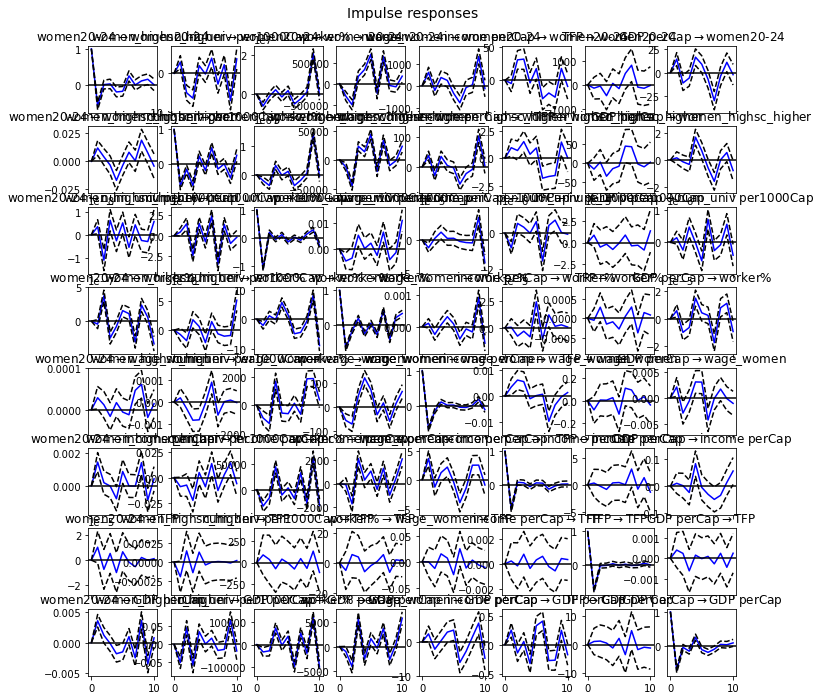

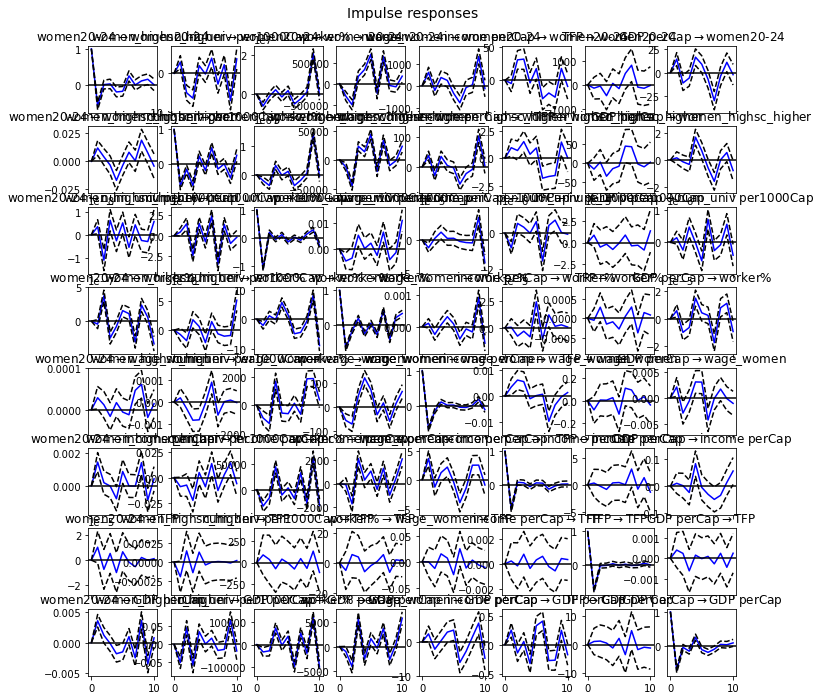

In [198]:
irf = model_result.irf(10)
irf.plot(orth=False)

In [242]:
import numpy as np
import pandas as pd
import graphviz
import lingam
from lingam.utils import make_dot, print_causal_directions, print_dagc

print([np.__version__, pd.__version__, graphviz.__version__, lingam.__version__])

np.set_printoptions(precision=3, suppress=True)
np.random.seed(0)

['1.19.5', '1.2.4', '0.16', '1.5.3']


In [374]:
model = lingam.VARLiNGAM()
model.fit(learning_data)

In [375]:
model.causal_order_

[3, 4, 5, 2, 6, 0, 7, 1]

In [376]:
model.adjacency_matrices_[1]

array([[    -0.229,      0.795, 104975.511, 377179.67 ,   1621.753,
           -23.859,      2.653, 288102.681],
       [     0.017,     -0.303,  -9536.224,   8562.947,      7.692,
            -0.207,      0.129, -16850.775],
       [    -0.   ,      0.   ,     -0.621,     -0.003,      0.   ,
             0.   ,      0.   ,     -0.025],
       [    -0.   ,     -0.   ,      1.343,     -0.333,      0.001,
             0.   ,      0.   ,     -0.042],
       [    -0.   ,      0.001,    629.921,     21.653,     -0.006,
             0.001,     -0.001,   -124.49 ],
       [    -0.   ,      0.007,  -4912.172,   2902.019,      7.232,
            -0.437,      0.02 ,   3056.093],
       [     0.007,     -0.061, -27176.522,  15394.528,     78.94 ,
            -1.266,     -0.376,  -3770.107],
       [    -0.   ,      0.   ,      0.579,     -0.008,      0.   ,
            -0.   ,      0.   ,     -0.237]])

In [377]:
model.residuals_

array([[-115163.959,   -5522.503,      -0.003, ...,    -167.61 ,
          -6105.533,      -0.01 ],
       [   -893.35 ,   -1345.088,       0.001, ...,     304.363,
            147.648,       0.01 ],
       [ -12935.213,     609.984,      -0.002, ...,    -200.786,
           -910.731,      -0.003],
       ...,
       [  41921.31 ,    3327.744,       0.002, ...,    -199.285,
           1647.811,      -0.012],
       [  15910.771,    1108.185,      -0.001, ...,    -156.633,
            384.753,      -0.004],
       [ -44990.927,   -4282.8  ,      -0.   , ...,   -1035.631,
          -2335.165,       0.024]])

In [378]:
dlingam = lingam.DirectLiNGAM()
dlingam.fit(model.residuals_)
dlingam.adjacency_matrix_

array([[     0.   ,      0.   ,      0.   , 307358.011,   3090.946,
             3.414,     11.771,      0.   ],
       [     0.06 ,      0.   ,  79756.323,   4997.875,      0.   ,
             0.57 ,      0.119,      0.   ],
       [     0.   ,      0.   ,      0.   ,      0.007,      0.   ,
             0.   ,      0.   ,      0.   ],
       [     0.   ,      0.   ,      0.   ,      0.   ,      0.   ,
             0.   ,      0.   ,      0.   ],
       [     0.   ,      0.   ,      0.   ,     14.986,      0.   ,
             0.   ,      0.   ,      0.   ],
       [     0.   ,      0.   ,      0.   ,   8021.459,     16.212,
             0.   ,      0.   ,      0.   ],
       [     0.   ,      0.   ,      0.   ,   5450.195,     67.125,
             0.527,      0.   ,      0.   ],
       [    -0.   ,      0.   ,      0.857,      0.069,      0.   ,
             0.   ,     -0.   ,      0.   ]])

In [391]:
#labels = ['women20-24(t)', 'women_highsc_higher(t)', 'num_univ per1000Cap(t)', 'worker%(t)', 'productivity(t)', 'wage_women(t)', 'TFP(t)', 'income perCap(t)', 'women20-24(t-1)', 'women_highsc_higher(t-1)', 'num_univ per1000Cap(t-1)', 'worker%(t-1)', 'productivity(t-1)', 'wage_women(t-1)', 'TFP(t-1)', 'income perCap(t-1)']
labels = ['women25-29(t)', 'women_highsc_higher(t)', 'num_univ per1000Cap(t)', 'worker%(t)', 'wage_women(t)', 'GDP perCap(t)','women_highsc_getjob(t)','num_vocsch per1000Cap(t)','women25-29(t-1)', 'women_highsc_higher(t-1)', 'num_univ per1000Cap(t-1)', 'worker%(t-1)', 'wage_women(t-1)', 'GDP perCap(t-1)','women_highsc_getjob(t-1)','num_vocsch per1000Cap(t-1)']
dot = make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)
dot.format = 'png'
dot.render('graph_image')

'graph_image.png'

In [18]:
df.head

<bound method NDFrame.head of         時点  地域コード    地域  男割合15-19  男割合20-24  男割合25-29  男割合30-34  女割合15-19  \
0     1981   1000   北海道  0.073508  0.066958  0.076783  0.096798  0.067903   
1     1981   2000   青森県  0.078804  0.063859  0.076087  0.093750  0.069620   
2     1981   3000   岩手県  0.073913  0.056522  0.073913  0.088406  0.063859   
3     1981   4000   宮城県  0.074253  0.077146  0.080039  0.096432  0.066542   
4     1981   5000   秋田県  0.069536  0.054636  0.074503  0.092715  0.061069   
...    ...    ...   ...       ...       ...       ...       ...       ...   
1499  2012  43000   熊本県  0.054118  0.047059  0.052941  0.058824  0.045929   
1500  2012  44000   大分県  0.051693  0.044563  0.051693  0.058824  0.043131   
1501  2012  45000   宮崎県  0.054820  0.039698  0.049149  0.056711  0.046901   
1502  2012  46000  鹿児島県  0.053232  0.040558  0.049430  0.057034  0.046771   
1503  2012  47000   沖縄県  0.062049  0.053391  0.060606  0.064935  0.057024   

      女割合20-24  女割合25-29  ...  boy就職割合/高卒  bo

## Independence between error variables（誤差変数間の独立性の検定）→「生産性」「TFP」「一人あたり県民所得」変数を取り除いた
To check if the LiNGAM assumption is broken, we can get p-values of independence between error variables. The value in the i-th row and j-th column of the obtained matrix shows the p-value of the independence of the error variables $e_i$ and $e_j$.

In [380]:
p_values = model.get_error_independence_p_values()
print(p_values)

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


## Bootstrap

In [381]:
result = model.bootstrap(learning_data, n_sampling=100)

## Causal Directions
Since `BootstrapResult` object is returned, we can get the ranking of the causal directions extracted by `get_causal_direction_counts()` method. In the following sample code, `n_directions` option is limited to the causal directions of the top 8 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.3 or more.

In [382]:
cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.3, split_by_causal_effect_sign=True)

In [383]:
print_causal_directions(cdc, 100, labels=labels)

GDP perCap(t) <--- num_vocsch per1000Cap(t-1) (b>0) (100.0%)
women_highsc_getjob(t) <--- women_highsc_getjob(t-1) (b<0) (100.0%)
women_highsc_higher(t) <--- worker%(t-1) (b>0) (100.0%)
wage_women(t) <--- num_univ per1000Cap(t-1) (b>0) (100.0%)
worker%(t) <--- worker%(t-1) (b<0) (100.0%)
women25-29(t) <--- women_highsc_higher(t-1) (b>0) (100.0%)
num_univ per1000Cap(t) <--- num_univ per1000Cap(t-1) (b<0) (100.0%)
women_highsc_getjob(t) <--- wage_women(t-1) (b>0) (100.0%)


# Directed Acyclic Graphs
Also, using the `get_directed_acyclic_graph_counts()` method, we can get the ranking of the DAGs extracted. In the following sample code, `n_dags` option is limited to the dags of the top 3 rankings, and `min_causal_effect` option is limited to causal directions with a coefficient of 0.2 or more.

In [384]:
dagc = result.get_directed_acyclic_graph_counts(n_dags=8, min_causal_effect=0.3, split_by_causal_effect_sign=True)

In [385]:
print_dagc(dagc, 100, labels=labels)

DAG[0]: 5.0%
	women25-29(t) <--- worker%(t) (b>0)
	women25-29(t) <--- wage_women(t) (b>0)
	women25-29(t) <--- GDP perCap(t) (b>0)
	women25-29(t) <--- women_highsc_getjob(t) (b>0)
	women25-29(t) <--- num_vocsch per1000Cap(t) (b<0)
	women25-29(t) <--- women25-29(t-1) (b<0)
	women25-29(t) <--- women_highsc_higher(t-1) (b>0)
	women25-29(t) <--- num_univ per1000Cap(t-1) (b>0)
	women25-29(t) <--- worker%(t-1) (b>0)
	women25-29(t) <--- wage_women(t-1) (b>0)
	women25-29(t) <--- GDP perCap(t-1) (b<0)
	women25-29(t) <--- women_highsc_getjob(t-1) (b>0)
	women25-29(t) <--- num_vocsch per1000Cap(t-1) (b>0)
	women_highsc_higher(t) <--- num_univ per1000Cap(t) (b>0)
	women_highsc_higher(t) <--- worker%(t) (b>0)
	women_highsc_higher(t) <--- GDP perCap(t) (b>0)
	women_highsc_higher(t) <--- women_highsc_higher(t-1) (b<0)
	women_highsc_higher(t) <--- num_univ per1000Cap(t-1) (b<0)
	women_highsc_higher(t) <--- worker%(t-1) (b>0)
	women_highsc_higher(t) <--- wage_women(t-1) (b>0)
	women_highsc_higher(t) <--

## Probability
Using the `get_probabilities()` method, we can get the probability of bootstrapping.

In [386]:
prob = result.get_probabilities(min_causal_effect=0.1)
print('Probability of B0:\n', prob[0])
print('Probability of B1:\n', prob[1])

Probability of B0:
 [[0.   0.07 0.3  0.74 0.7  0.76 0.97 0.48]
 [0.   0.   0.78 0.86 0.04 0.86 0.75 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.2  0.   0.   0.   0.   0.2 ]
 [0.   0.   0.33 0.49 0.   0.   0.   0.17]
 [0.   0.   0.05 0.8  0.75 0.   0.   0.39]
 [0.   0.02 0.41 0.78 0.64 0.63 0.   0.53]
 [0.   0.   0.57 0.03 0.   0.   0.   0.  ]]
Probability of B1:
 [[1.   1.   1.   1.   1.   1.   1.   1.  ]
 [0.   1.   1.   1.   1.   0.88 0.98 1.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   1.   0.   0.   0.   0.11]
 [0.   0.   1.   1.   0.37 0.   0.   1.  ]
 [0.   0.   1.   1.   1.   1.   0.   1.  ]
 [0.   0.11 1.   1.   1.   0.99 1.   1.  ]
 [0.   0.   0.6  0.01 0.   0.   0.   1.  ]]


## Total Causal Effects
Using the `get_causal_effects()` method, we can get the list of total causal effect. The total causal effects we can get are dictionary type variable.
We can display the list nicely by assigning it to pandas.DataFrame. Also, we have replaced the variable index with a label below.

In [387]:
print(prob)

[array([[0.  , 0.07, 0.3 , 0.74, 0.7 , 0.76, 0.97, 0.48],
       [0.  , 0.  , 0.78, 0.86, 0.04, 0.86, 0.75, 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.2 , 0.  , 0.  , 0.  , 0.  , 0.2 ],
       [0.  , 0.  , 0.33, 0.49, 0.  , 0.  , 0.  , 0.17],
       [0.  , 0.  , 0.05, 0.8 , 0.75, 0.  , 0.  , 0.39],
       [0.  , 0.02, 0.41, 0.78, 0.64, 0.63, 0.  , 0.53],
       [0.  , 0.  , 0.57, 0.03, 0.  , 0.  , 0.  , 0.  ]]), array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.  , 1.  , 1.  , 1.  , 1.  , 0.88, 0.98, 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.11],
       [0.  , 0.  , 1.  , 1.  , 0.37, 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ],
       [0.  , 0.11, 1.  , 1.  , 1.  , 0.99, 1.  , 1.  ],
       [0.  , 0.  , 0.6 , 0.01, 0.  , 0.  , 0.  , 1.  ]])]


In [392]:
pd.set_option('display.max_rows', 150)
causal_effects = result.get_total_causal_effects(min_causal_effect=0.01)
df = pd.DataFrame(causal_effects)
df25to29= df
df25to29.to_csv("25to29", sep=",")

df['from'] = df['from'].apply(lambda x : labels[x])
df['to'] = df['to'].apply(lambda x : labels[x])
df

,from,to,effect,probability
0,num_vocsch per1000Cap(t-1),num_vocsch per1000Cap(t),-2.407676e-01,1.00
1,GDP perCap(t-1),GDP perCap(t),-3.754419e-01,1.00
2,worker%(t-1),num_vocsch per1000Cap(t),-7.448519e-02,1.00
3,worker%(t-1),worker%(t),-4.633166e-01,1.00
4,women_highsc_getjob(t-1),women_highsc_getjob(t),-3.542202e-01,1.00
5,num_vocsch per1000Cap(t-1),num_univ per1000Cap(t),-2.790394e-02,1.00
6,women_highsc_getjob(t-1),women_highsc_higher(t),-3.500748e-01,1.00
7,women_highsc_getjob(t-1),women25-29(t),-6.328095e+00,1.00
8,wage_women(t-1),women25-29(t),7.577260e+02,1.00
9,num_univ per1000Cap(t-1),num_univ per1000Cap(t),-5.053874e-01,1.00


In [389]:
df.sort_values('effect', ascending=False).head()

,from,to,effect,probability
57,num_univ per1000Cap(t),women25-29(t),6.129219e+06,0.50
10,num_univ per1000Cap(t-1),women25-29(t),3.799903e+06,1.00
31,worker%(t),women25-29(t),5.309271e+05,0.79
37,num_vocsch per1000Cap(t-1),women25-29(t),2.904753e+05,0.73
18,num_univ per1000Cap(t-1),women_highsc_higher(t),1.481737e+05,0.90


In [390]:
df[df['to']=='women25-29(t)'].head()

,from,to,effect,probability
7,women_highsc_getjob(t-1),women25-29(t),-6.328095e+00,1.00
8,wage_women(t-1),women25-29(t),7.577260e+02,1.00
10,num_univ per1000Cap(t-1),women25-29(t),3.799903e+06,1.00
11,women_highsc_getjob(t),women25-29(t),1.178539e+01,1.00
15,women25-29(t-1),women25-29(t),-3.769529e-01,0.94


In [ ]:
labels = ['women20-24(t)', 'women_highsc_higher(t)', 'num_univ per1000Cap(t)', 'worker%(t)', 'productivity(t)', 'wage_women(t)', 'TFP(t)', 'income perCap(t)', 'women20-24(t-1)', 'women_highsc_higher(t-1)', 'num_univ per1000Cap(t-1)', 'worker%(t-1)', 'productivity(t-1)', 'wage_women(t-1)', 'TFP(t-1)', 'income perCap(t-1)']
make_dot(np.hstack(model.adjacency_matrices_), ignore_shape=True, lower_limit=0.05, labels=labels)